In [21]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import date, datetime

In [41]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [42]:
# drops the column ID, ignores if already dropped (does not raise error)
data = data.drop('ID', axis=1, errors='ignore')
data['Year_Birth'] = date.today().year - data['Year_Birth']
data.rename(columns={'Year_Birth': 'Age'}, inplace=True)
data.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [43]:
# number of people with age > 100 is 3
print(data['Age'].where(data['Age'] > 100).count())

3


In [44]:
data[['Age', 'Response']].corr()

,Age,Response
Age,1.000000,-0.021325
Response,-0.021325,1.000000


In [45]:
data = data.drop(columns=['Age'], errors='ignore')

- As suspected, age and response have $0$ correlation with each other, therefore we will drop that column. 
- We will do a similar thing, with `Dt_Customer`.

In [46]:
datetime.strptime("04-09-2012", '%d-%m-%Y')

datetime.datetime(2012, 9, 4, 0, 0)

In [47]:
from dateutil.relativedelta import relativedelta
data['Dt_Customer'] = data['Dt_Customer'].apply(lambda x: relativedelta(datetime.now(), datetime.strptime(x, '%d-%m-%Y')).years)
data.rename(columns={'Dt_Customer': 'Customer_Years'}, inplace=True)

<AxesSubplot:>

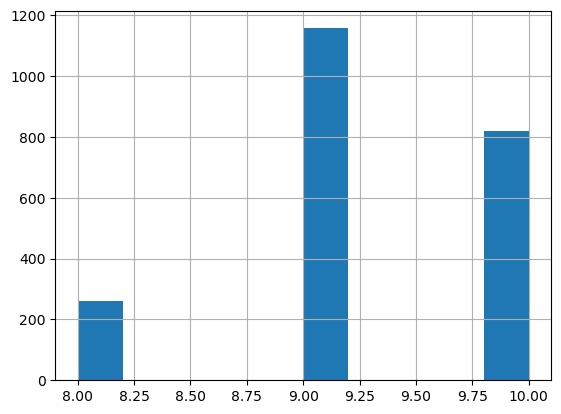

In [48]:
data.Customer_Years.hist()

In [49]:
data[['Customer_Years', 'Response']].corr()

,Customer_Years,Response
Customer_Years,1.000000,0.173127
Response,0.173127,1.000000


In [50]:
print(data[['Kidhome', 'Response']].corr())

# since correlation is not much, we drop it
data = data.drop(columns=['Kidhome'], errors='ignore')

           Kidhome  Response
Kidhome   1.000000 -0.080008
Response -0.080008  1.000000


In [51]:
data[['Education', 'Response']].corr()

,Response
Response,1.0


In [22]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Only income has NULL values**

In [31]:
incomes = data['Income'].to_numpy()
np.nanmin(incomes), np.nanmax(incomes)

(1730.0, 666666.0)

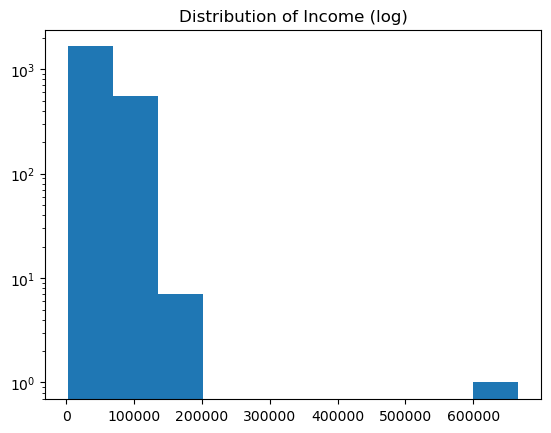

In [38]:
plt.title('Distribution of Income (log)')
plt.hist(incomes, log=True) ;

In [39]:
data['Income'] = data['Income'].fillna(data['Income'].median())

In [41]:
# proves that income column now has 0 NaN values
data['Income'].isnull().sum()

0

In [58]:
# gets distribution of education in the dataset
educations = data['Education'].value_counts(normalize=True)
educations

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

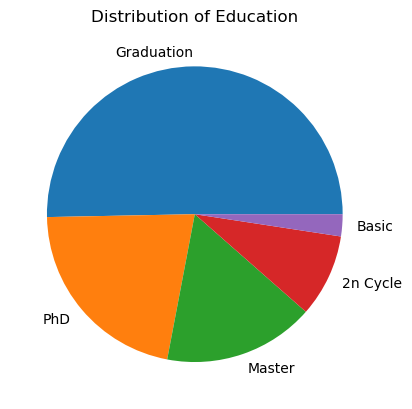

In [60]:
def plot_series_pie(series: pd.Series, plot_title=None):
  """`series` should be normalised"""

  series = series * 100
  keys = series.keys()

  if plot_title:
    plt.title(plot_title)

  plt.pie(series, labels=keys)

plot_series_pie(educations, 'Distribution of Education')

In [75]:
pd.get_dummies(data['Education'])

,2n Cycle,Basic,Graduation,Master,PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2235,0,0,1,0,0
2236,0,0,0,0,1
2237,0,0,1,0,0
2238,0,0,0,1,0


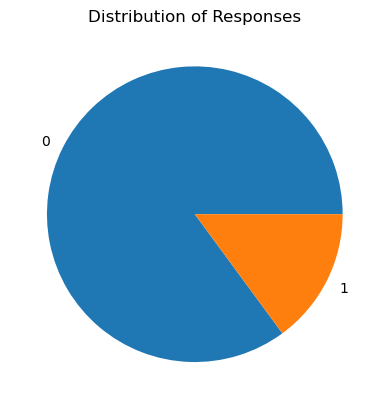

In [66]:
plot_series_pie(data['Response'].value_counts(True), 'Distribution of Responses')

KeyError: 4